# Problem Description

The problem we tackle in this talk is the following: We have some entity (may it be biological or a machine) emitting a
signal. This signal can be sensed with a specific sensor type. But we have data from different recordings where always a
different specific sensor of this type is used. Also only a fraction of the recording is labeled.

Image f.e. you want to make a classifier for drowsiness in driving based on heart rate/ecg data. For driving the
experiments with labels are all small. But there is a lot of other datasets out there where people become drowsy in
another context. For Deep-Learning you want to use all of that data. However, the concrete sensors recording that signal
vary a lot. You want to first train the system to a common representation, so that each dataset get projected into a
space where the data is still classifiable but the differences of the sensors are very small. We then can do transfer
learning with a network working on those embeddings.

In this notebook we abstract the example again. We generate a fictious signal consiting of segments of sinus waves,
square and triangle sections and flat singal with irrelgular peaks (so we have four charakeristics we later want to
classify). Lets see an example below:

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils as ut
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
ts_length = 3000 #in 100Hz
ts_generators = ut.SignalTypes(100).get_callback_dict(ut.SignalTypes.TYPES, 3, 10)
tsc = ut.TimeSeriesCreator(ts_length, 200, ut.SignalTypes.TYPES, ts_generators)

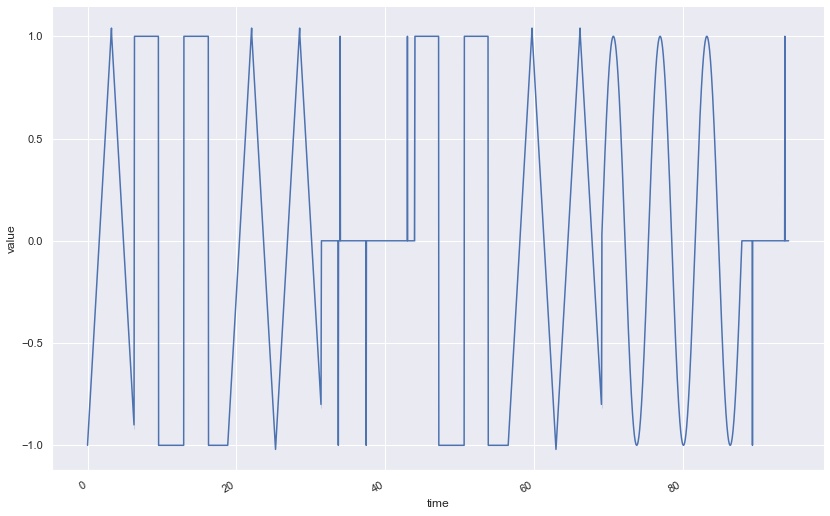

In [3]:
df = pd.DataFrame(tsc.ts)
df.columns = ["time", "value"]
g = sns.relplot(x="time", y="value", kind="line", data=df, height=8.27, aspect=11.7/8.27)
g.fig.autofmt_xdate()

Additionally we simulate different sensors, who sense the data differently. In our case this is sampling frequency and
noise.

data with only two columns is assumed to have no missing value field, just return the whole index


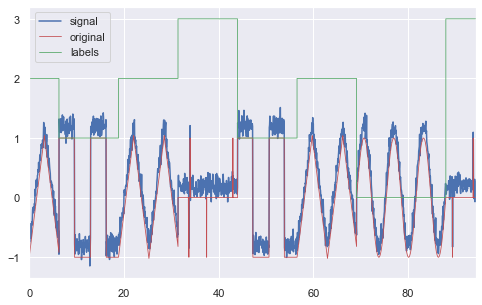

In [4]:
signal_noise = ut.AugmentTSSignal(tsc.ts).add_noise(0.2, 0.1).downsample(2).data
downsampled_only = signal_noise[signal_noise[:,2]==0]

plt.figure(figsize=(8,5))

plt.plot(downsampled_only[:,0], downsampled_only[:,1], 'b-', label='signal') # y
plt.plot(tsc.ts[:,0], tsc.ts[:,1], 'r-', linewidth=0.8, label='original')
plt.plot(tsc.ts[:,0], tsc.labels, 'g-', linewidth=0.8, label='labels')

x_max = (ts_length/100)*np.pi
plt.xlim(0, x_max)

plt.legend(loc='best')
plt.show()

data with only two columns is assumed to have no missing value field, just return the whole index


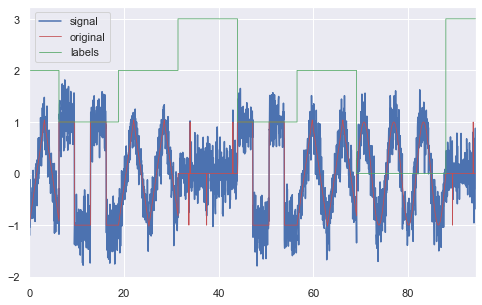

In [6]:
signal_noise = ut.AugmentTSSignal(tsc.ts).add_noise(0.0, 0.3).downsample(5).data
downsampled_only = signal_noise[signal_noise[:,2]==0]

plt.figure(figsize=(8,5))

plt.plot(downsampled_only[:,0], downsampled_only[:,1], 'b-', label='signal') # y
plt.plot(tsc.ts[:,0], tsc.ts[:,1], 'r-', linewidth=0.8, label='original')
plt.plot(tsc.ts[:,0], tsc.labels, 'g-', linewidth=0.8, label='labels')

x_max = (ts_length/100)*np.pi
plt.xlim(0, x_max)

plt.legend(loc='best')
plt.show()
